In [1]:
#lbbVIXAnalysis-9-2
# insert new Yield Curve with the rest of the features
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 2000)
pd.options.display.float_format = "{:,.2f}".format
import numpy as np
from numpy.polynomial.polynomial import polyfit
from matplotlib import pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns

pd.set_option('display.expand_frame_repr', True)

from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import Image

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.cluster import KMeans
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


### IMPORT TRAINING STEPS ###
#   split training and testing data
from sklearn.model_selection import train_test_split
#   using the pipeline
from sklearn.pipeline import make_pipeline
#   using standardization during cross validation scoring
from sklearn.preprocessing import StandardScaler
#   using GridSearch Cross Validation and folding
from sklearn.model_selection import GridSearchCV

### COMPUTE THE WINNING ALGO METRICS ###
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score #best for classifier models
from sklearn.metrics import confusion_matrix #best for classifier models
from sklearn.metrics import roc_curve, roc_auc_score #best for classifier models Area Under ROC Curve
from sklearn.metrics import adjusted_rand_score #adjust rand index for unsupervised classifications

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest


# to Ignore and ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

import os
os.getcwd()

'C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final\\_projectNotebooks'

In [2]:
os.chdir('c:\\users\\cinderella\\datasci\\datascience\\elitedatascience\\07-cornerstoneproject\\Final')

In [3]:
df = pd.read_csv('df-9.csv', index_col=0) # includes all rows before cleanup for algos

In [4]:
df = df.round(3)
df.tail()

,tradeDate,1,2,3,4,5,6,7,8,9,diffSetCl1,diffSetCl2,diffSetCl3,diffSetCl4,diffSetCl5,diffSetCl6,diffSetCl7,diffSetCl8,diffSetCl9,rngDayHL1,rngDayHL2,rngDayHL3,rngDayHL4,rngDayHL5,rngDayHL6,rngDayHL7,rngDayHL8,rngDayHL9,rngDayOC1,rngDayOC2,rngDayOC3,rngDayOC4,rngDayOC5,rngDayOC6,rngDayOC7,rngDayOC8,rngDayOC9,SettlMax,SettlMin,diffMaxMin,sig8over9,sig1over2,rngSlope6,avg6,rngSlope7,rngSlope9,nTerm,fTerm,curve,nTerm2,fTerm2,nTerm2b,fTerm2b,curve2b,nTerm3,fTerm3,curve3,SPX_Close,VIX_Close,pctChgSPX,pctChgVIX,FXI_Close,pctChgFXI,curve3P,curve3N,curve3ChgState,SPXcumPChg,curve2b3,%one2Next,SSTMean,STMean,MTMean,LTMean,sig01,sig02,sig03,sig04,yieldSpread,clusters
3429,2020-08-14,23.27,26.98,30.05,28.77,28.30,28.68,28.32,27.95,27.57,-0.01,0.04,-0.08,-0.07,0.05,0.12,0.12,0.05,27.57,1.35,1.05,0.82,0.68,0.60,0.55,0.50,0.45,-0.10,0.09,0.14,0.11,0.20,0.40,0.23,0.21,0.10,0.00,30.05,23.27,6.78,1.00,0.00,5.40,27.68,5.05,4.30,0.16,-0.02,0.06,0.11,-0.01,0.10,0.04,2.21,0.14,-0.02,5.05,"3,372.85",22.05,-0.02,-0.36,43.04,0.54,1.00,0.00,325.00,116.50,7.26,90.00,0.10,0.15,0.50,1.33,0.00,0.00,0.00,0.00,1.23,2.00
3430,2020-08-17,21.77,25.82,29.12,28.12,27.38,27.88,27.77,27.40,26.15,-0.12,-0.10,-0.20,-0.28,-0.23,-0.14,-0.10,-0.10,26.15,1.43,1.05,0.92,0.79,0.79,0.70,0.45,0.43,-4.75,-1.25,-0.87,-0.63,-0.30,-0.46,-0.45,-0.28,-0.20,0.00,29.12,21.77,7.35,1.00,0.00,6.10,26.68,6.00,4.38,0.19,-0.01,0.07,0.13,0.00,0.11,0.04,2.53,0.16,-0.01,5.59,"3,381.99",21.35,0.27,-3.17,43.84,1.86,1.00,0.00,325.00,116.77,8.12,90.00,0.10,0.15,0.49,1.31,0.00,0.00,0.00,0.00,1.21,2.00
3431,2020-08-18,21.77,25.48,28.82,28.23,27.48,27.77,27.68,27.38,25.40,-0.17,-0.07,-0.03,-0.03,0.06,0.03,0.03,-0.03,25.40,1.16,0.85,0.78,0.61,0.55,0.60,0.50,0.40,-2.60,0.14,-0.30,-0.42,-0.12,0.02,-0.12,-0.12,-0.12,0.00,28.82,21.77,7.05,1.00,0.00,6.00,26.59,5.90,3.62,0.17,-0.02,0.06,0.13,-0.00,0.12,0.04,2.63,0.14,-0.02,5.45,"3,389.78",21.51,0.23,0.75,44.01,0.39,1.00,0.00,325.00,117.00,8.08,88.89,0.10,0.15,0.47,1.28,0.00,0.00,0.00,0.00,1.18,2.00
3432,2020-08-19,21.71,26.23,29.38,28.68,27.90,28.12,28.12,27.80,25.35,-0.09,-0.03,-0.03,-0.01,-0.02,-0.03,-0.03,0.00,-0.15,0.35,1.07,0.83,0.63,0.65,0.63,0.64,0.54,0.15,-0.15,0.70,0.55,0.46,0.52,0.35,0.50,0.44,0.00,29.38,21.71,7.67,1.00,0.00,6.42,27.00,6.42,3.64,0.21,-0.02,0.07,0.12,-0.00,0.11,0.04,2.36,0.17,-0.02,6.33,"3,374.85",22.54,-0.44,4.79,43.55,-1.04,1.00,0.00,325.00,116.56,8.68,77.78,0.10,0.15,0.48,1.31,0.00,0.00,0.00,0.00,1.21,2.00
3433,2020-08-20,25.88,29.23,28.57,27.82,27.98,27.98,27.62,27.38,0.00,-0.01,0.01,0.07,0.03,0.04,0.03,0.03,0.33,0.00,1.66,1.21,0.95,0.87,0.95,0.85,0.93,0.25,0.00,-0.47,-0.18,-0.20,-0.12,-0.18,-0.26,0.10,0.00,0.00,29.23,25.88,3.35,0.00,0.00,2.10,27.91,1.75,0.00,0.13,-0.01,0.04,-0.02,-0.02,-0.02,0.04,-1.93,0.12,-0.01,4.02,"3,385.51",22.72,0.32,0.80,43.75,0.46,1.00,0.00,325.00,116.88,2.09,88.89,0.10,0.13,0.46,1.26,0.00,0.00,0.00,0.00,1.16,2.00


In [5]:
df['pctChgSPX'] = np.where(df['pctChgSPX']== 0.00, 0.01, df['pctChgSPX'])

In [6]:
del df['tradeDate']

In [7]:
#for columns in ['%one2Next','SSTMean','STMean','MTMean','LTMean','sig01','sig02','sig03','sig04','yieldSpread','clusters']:
   # df.loc[:,columns] = df.loc[:,columns].ffill() ##SHOULD NOT BE NEEDED

In [8]:
df.iloc[df.values==np.inf]

,1,2,3,4,5,6,7,8,9,diffSetCl1,diffSetCl2,diffSetCl3,diffSetCl4,diffSetCl5,diffSetCl6,diffSetCl7,diffSetCl8,diffSetCl9,rngDayHL1,rngDayHL2,rngDayHL3,rngDayHL4,rngDayHL5,rngDayHL6,rngDayHL7,rngDayHL8,rngDayHL9,rngDayOC1,rngDayOC2,rngDayOC3,rngDayOC4,rngDayOC5,rngDayOC6,rngDayOC7,rngDayOC8,rngDayOC9,SettlMax,SettlMin,diffMaxMin,sig8over9,sig1over2,rngSlope6,avg6,rngSlope7,rngSlope9,nTerm,fTerm,curve,nTerm2,fTerm2,nTerm2b,fTerm2b,curve2b,nTerm3,fTerm3,curve3,SPX_Close,VIX_Close,pctChgSPX,pctChgVIX,FXI_Close,pctChgFXI,curve3P,curve3N,curve3ChgState,SPXcumPChg,curve2b3,%one2Next,SSTMean,STMean,MTMean,LTMean,sig01,sig02,sig03,sig04,yieldSpread,clusters


In [9]:
df.isnull().values.any() #yes or no
df.isnull().sum().sum() #number of
#df.isnull().any()#what columns have NaN

0

In [10]:
X = df.drop("pctChgSPX", 1)

In [11]:
y = df["pctChgSPX"]

In [12]:
X_train, X_TEST, y_train, y_TEST = train_test_split(X, y, test_size=.20, random_state=123)

In [13]:
print(len(X_train), len(X_TEST), len(y_train), len(y_TEST))

2746 687 2746 687


In [14]:
# make a threshold for quasi constant.
threshold = 0.98

# create empty list
quasi_constant_feature = []

# loop over all the columns
for feature in X_train.columns:

    # calculate the ratio.
    predominant = (X_train[feature].value_counts() / np.float(len(X_train))).sort_values(ascending=False).values[0]
    
    # append the column name if it is bigger than the threshold
    if predominant >= threshold:
        quasi_constant_feature.append(feature)   
        
print(quasi_constant_feature)

# drop the quasi constant columns
X_train.drop(labels=quasi_constant_feature, axis=1, inplace=True)
X_TEST.drop(labels=quasi_constant_feature, axis=1, inplace=True)

['sig04']


C:\Users\cinderella\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
# import the required functions and object.
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# select the number of features you want to retain.
select_k = 10

# create the SelectKBest with the mutual info strategy.
selection = SelectKBest(f_classif, k=select_k).fit(X_train, y_train)

# display the retained features.
features = X_train.columns[selection.get_support()]
print(features)

Index(['rngDayHL5', 'rngDayOC1', 'rngDayOC2', 'rngDayOC3', 'rngDayOC4',
       'rngDayOC9', 'rngSlope6', 'VIX_Close', 'pctChgVIX', 'pctChgFXI'],
      dtype='object')


In [16]:
dfBrief = df.copy()

In [17]:
dfBrief[['rngDayHL5', 'rngDayOC1', 'rngDayOC2', 'rngDayOC3', 'rngDayOC4',
       'rngDayOC9', 'rngSlope6', 'VIX_Close', 'pctChgVIX', 'pctChgFXI', 'pctChgSPX']]

,rngDayHL5,rngDayOC1,rngDayOC2,rngDayOC3,rngDayOC4,rngDayOC9,rngSlope6,VIX_Close,pctChgVIX,pctChgFXI,pctChgSPX
0,0.00,0.00,0.00,0.00,0.00,0.00,3.18,12.04,0.00,4.44,0.01
1,0.12,-0.12,-0.01,-0.23,-0.10,0.00,3.34,11.51,-4.40,-3.52,0.12
2,0.13,0.20,0.25,0.14,0.00,0.00,3.12,12.14,5.47,-5.66,-0.61
3,0.30,-0.15,-0.15,0.12,0.04,0.00,3.21,12.00,-1.15,2.93,0.22
4,0.10,0.09,-0.07,-0.17,-0.09,0.00,3.01,11.91,-0.75,-4.45,-0.05
...,...,...,...,...,...,...,...,...,...,...,...
3429,0.60,0.09,0.14,0.11,0.20,0.00,5.40,22.05,-0.36,0.54,-0.02
3430,0.79,-1.25,-0.87,-0.63,-0.30,0.00,6.10,21.35,-3.17,1.86,0.27
3431,0.55,0.14,-0.30,-0.42,-0.12,0.00,6.00,21.51,0.75,0.39,0.23
3432,0.65,-0.15,0.70,0.55,0.46,0.00,6.42,22.54,4.79,-1.04,-0.44


In [18]:
X = dfBrief.drop("pctChgSPX", 1)

In [19]:
y = dfBrief["pctChgSPX"]

In [20]:
X_train, X_TEST, y_train, y_TEST = train_test_split(X, y, test_size=.20, random_state=123)

In [21]:
print(len(X_train), len(X_TEST), len(y_train), len(y_TEST))

2746 687 2746 687


## Pipeline dictionary

In [22]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet (random_state = 123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

In [23]:
print('lasso',type(pipelines['lasso']))
print('ridge',type(pipelines['ridge']))
print('enet',type(pipelines['enet']))
print('rf',type(pipelines['rf']))
print('gb',type(pipelines['gb']))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


## Model specific hyperparameters

In [24]:
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}
ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}
enet_hyperparameters = {
    'elasticnet__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}
rf_hyperparameters = {
    'randomforestregressor__n_estimators':[50, 100, 200],
    'randomforestregressor__max_features':['auto','sqrt',0.33]
}
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [100, 400],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2, .5],
    'gradientboostingregressor__max_depth' : [1,3,5,8]
}

## Hyperparameters dictionary

In [25]:
hyperparameters = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [26]:
# test hyperparameters setup
for key in ['enet','gb','ridge','rf','lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.')
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.')
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [27]:
# test one model
model = GridSearchCV(pipelines['ridge'], hyperparameters['ridge'], cv=10, n_jobs=-1)

In [28]:
model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge(random_state=123))]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,
                                          5, 10]})

In [29]:
## Model Fitting

In [30]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'has been fitted')

lasso has been fitted
ridge has been fitted
enet has been fitted
rf has been fitted
gb has been fitted


### Reaffirm model selection class

In [31]:
print( 'lasso', type(fitted_models['lasso'] ))
print( 'ridge', type(fitted_models['ridge'] ))
print( 'enet', type(fitted_models['enet'] ))
print( 'rf', type(fitted_models['rf'] ))
print( 'gb', type(fitted_models['gb'] ))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


### For each model, that was fitted, run prediction using X_TEST

In [32]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_TEST)
        print(name, 'has been fitted- prediction on X_TEST.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted- prediction on X_TEST.
ridge has been fitted- prediction on X_TEST.
enet has been fitted- prediction on X_TEST.
rf has been fitted- prediction on X_TEST.
gb has been fitted- prediction on X_TEST.


## Model Selection

### Display CV scores for each model

In [33]:
#best cv score is best holdout 
for name, model in fitted_models.items():
    print(name, model.best_score_ )

lasso 0.7185952394773162
ridge 0.6719228013366345
enet 0.7186970332771377
rf 0.7726344485593986
gb 0.7726651368801869


### Display R^2 and MAE Scores between actual values (y_TEST) and prediction (predict X_TEST)

In [34]:
for name, model in fitted_models.items():
    pred = model.predict(X_TEST)
    print( name )
    print('------')
    print( 'R^2:', r2_score(y_TEST, pred))
    print( 'MAE:', mean_absolute_error(y_TEST, pred),'\n')

lasso
------
R^2: 0.7482128502838912
MAE: 0.441039898641973 

ridge
------
R^2: 0.7429234565453607
MAE: 0.45062291000441135 

enet
------
R^2: 0.7412318134867093
MAE: 0.441987524003019 

rf
------
R^2: 0.8128799516995757
MAE: 0.37815052401746724 

gb
------
R^2: 0.8246768057584832
MAE: 0.388351396261402 



## List highest CV, MAE and R^2

### Plot of Highest Scoring Model - Gradient Boosting Regressor -  highest CV .7726/ R2 .824, MAE .388

In [35]:
gb_pred = fitted_models['gb'].predict(X_TEST)
######################################################################3333
#### For general Lin Reg
#######################################################################333333
results = sm.OLS(y_TEST,sm.add_constant(X_TEST)).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pctChgSPX   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     37.06
Date:                Thu, 27 Aug 2020   Prob (F-statistic):          6.27e-182
Time:                        02:18:45   Log-Likelihood:                -572.89
No. Observations:                 687   AIC:                             1298.
Df Residuals:                     611   BIC:                             1642.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0099      0.478      0.021      0.983      -0.928       0.948
1                -12.8034     14.332     -0.893      0.372     -40.949      15.342
2                -12.4512     14.319     -0.870      0.385     -40.571      15.669
3                -12.9877     14.325     -0.907      0.365     -41.121      15.145
4                -13.1087     14.325     -0.915      0.361     -41.241      15.024
5                -12.8128     14.324     -0.895      0.371     -40.943      15.317
6                -12.8394     14.324     -0.896      0.370     -40.969      15.290
7                  0.0099      0.009      1.085      0.278      -0.008       0.028
8                 -0.0026      0.009     -0.279      0.780      -0.021       0.016
9                  0.0059      0.004      1.489      0.137      -0.002       0.014
diffSetCl1        -0.0741      0.123     -0.603      0.547      -0.315       0.167
diffSetCl2        -0.4275      0.539     -0.793      0.428      -1.486       0.631
diffSetCl3         1.5287      0.573      2.668      0.008       0.403       2.654
diffSetCl4         0.0475      0.040      1.178      0.239      -0.032       0.127
diffSetCl5        -0.0257      0.026     -0.981      0.327      -0.077       0.026
diffSetCl6        -0.0063      0.012     -0.528      0.598      -0.030       0.017
diffSetCl7        -0.0005      0.008     -0.057      0.955      -0.017       0.016
diffSetCl8        -0.0056      0.006     -0.990      0.323      -0.017       0.005
diffSetCl9        -0.0033      0.004     -0.926      0.355      -0.010       0.004
rngDayHL1         -0.2089      0.068     -3.075      0.002      -0.342      -0.076
rngDayHL2          0.0969      0.052      1.847      0.065      -0.006       0.200
rngDayHL3          0.3739      0.157      2.379      0.018       0.065       0.683
rngDayHL4          0.2147      0.160      1.342      0.180      -0.099       0.529
rngDayHL5         -0.2834      0.210     -1.351      0.177      -0.696       0.129
rngDayHL6          0.0901      0.136      0.661      0.509      -0.178       0.358
rngDayHL7          0.0181      0.158      0.115      0.909      -0.292       0.328
rngDayHL8         -0.2532      0.141     -1.792      0.074      -0.531       0.024
rngDayHL9         -0.0188      0.018     -1.044      0.297      -0.054       0.017
rngDayOC1         -0.4108      0.067     -6.174      0.000      -0.541      -0.280
rngDayOC2          0.0691      0.134      0.517      0.605      -0.193       0.332
rngDayOC3         -0.1532      0.179     -0.854      0.394      -0.506       0.199
rngDayOC4          0.2444      0.214      1.141      0.254      -0.176       0.665
rngDayOC5         -0.5393      0.181     -2.981      0.003      -0.895      -0.184
rngDayOC6          0.1671      0.129      1.299      0.194      -0.086       0.420
rngDayOC7   

In [36]:
print(gb_pred.min(),gb_pred.max())
print(y_TEST.min(), y_TEST.max())

-7.775325165908081 5.533721123755703
-7.617 7.076


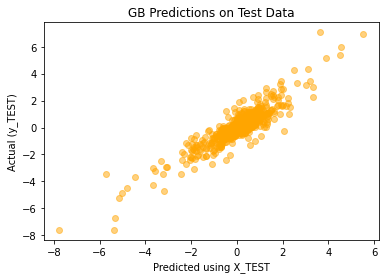

In [76]:
plt.scatter(gb_pred, y_TEST, color='orange', alpha=.5)

plt.xlabel('Predicted using X_TEST')
plt.ylabel('Actual (y_TEST)')
plt.title('GB Predictions on Test Data')

plt.show()

Text(0.5, 1.0, 'Gradient Boosting Regressor Predictions on Test Data')

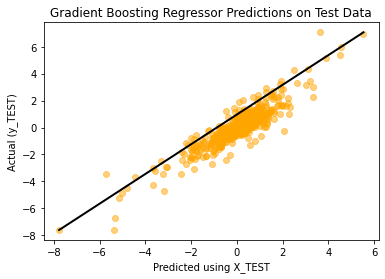

In [77]:
plt.scatter(gb_pred, y_TEST, color='orange', alpha=.5)
plt.plot([gb_pred.min(), gb_pred.max()], [y_TEST.min(), y_TEST.max()], color = 'black', linewidth = 2)

plt.xlabel('Predicted using X_TEST')
plt.ylabel('Actual (y_TEST)')
plt.title('Gradient Boosting Regressor Predictions on Test Data')

### Plot of Highest Scoring Model - Random Forest Regressor - CV .7726/ R2 .8128, MAE .3781

In [51]:
rf_pred = fitted_models['rf'].predict(X_TEST)
######################################################################3333
#### For general Lin Reg
#######################################################################333333
results = sm.OLS(y_TEST,sm.add_constant(X_TEST)).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pctChgSPX   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     37.06
Date:                Thu, 27 Aug 2020   Prob (F-statistic):          6.27e-182
Time:                        02:26:11   Log-Likelihood:                -572.89
No. Observations:                 687   AIC:                             1298.
Df Residuals:                     611   BIC:                             1642.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0099      0.478      0.021      0.983      -0.928       0.948
1                -12.8034     14.332     -0.893      0.372     -40.949      15.342
2                -12.4512     14.319     -0.870      0.385     -40.571      15.669
3                -12.9877     14.325     -0.907      0.365     -41.121      15.145
4                -13.1087     14.325     -0.915      0.361     -41.241      15.024
5                -12.8128     14.324     -0.895      0.371     -40.943      15.317
6                -12.8394     14.324     -0.896      0.370     -40.969      15.290
7                  0.0099      0.009      1.085      0.278      -0.008       0.028
8                 -0.0026      0.009     -0.279      0.780      -0.021       0.016
9                  0.0059      0.004      1.489      0.137      -0.002       0.014
diffSetCl1        -0.0741      0.123     -0.603      0.547      -0.315       0.167
diffSetCl2        -0.4275      0.539     -0.793      0.428      -1.486       0.631
diffSetCl3         1.5287      0.573      2.668      0.008       0.403       2.654
diffSetCl4         0.0475      0.040      1.178      0.239      -0.032       0.127
diffSetCl5        -0.0257      0.026     -0.981      0.327      -0.077       0.026
diffSetCl6        -0.0063      0.012     -0.528      0.598      -0.030       0.017
diffSetCl7        -0.0005      0.008     -0.057      0.955      -0.017       0.016
diffSetCl8        -0.0056      0.006     -0.990      0.323      -0.017       0.005
diffSetCl9        -0.0033      0.004     -0.926      0.355      -0.010       0.004
rngDayHL1         -0.2089      0.068     -3.075      0.002      -0.342      -0.076
rngDayHL2          0.0969      0.052      1.847      0.065      -0.006       0.200
rngDayHL3          0.3739      0.157      2.379      0.018       0.065       0.683
rngDayHL4          0.2147      0.160      1.342      0.180      -0.099       0.529
rngDayHL5         -0.2834      0.210     -1.351      0.177      -0.696       0.129
rngDayHL6          0.0901      0.136      0.661      0.509      -0.178       0.358
rngDayHL7          0.0181      0.158      0.115      0.909      -0.292       0.328
rngDayHL8         -0.2532      0.141     -1.792      0.074      -0.531       0.024
rngDayHL9         -0.0188      0.018     -1.044      0.297      -0.054       0.017
rngDayOC1         -0.4108      0.067     -6.174      0.000      -0.541      -0.280
rngDayOC2          0.0691      0.134      0.517      0.605      -0.193       0.332
rngDayOC3         -0.1532      0.179     -0.854      0.394      -0.506       0.199
rngDayOC4          0.2444      0.214      1.141      0.254      -0.176       0.665
rngDayOC5         -0.5393      0.181     -2.981      0.003      -0.895      -0.184
rngDayOC6          0.1671      0.129      1.299      0.194      -0.086       0.420
rngDayOC7   

In [52]:
print(rf_pred.min(),rf_pred.max())
print(y_TEST.min(), y_TEST.max())

-5.3778900000000025 6.042769999999999
-7.617 7.076


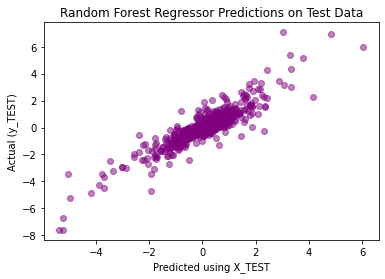

In [78]:
plt.scatter(rf_pred, y_TEST, color='purple', alpha=.5)

plt.xlabel('Predicted using X_TEST')
plt.ylabel('Actual (y_TEST)')
plt.title('Random Forest Regressor Predictions on Test Data')

plt.show()

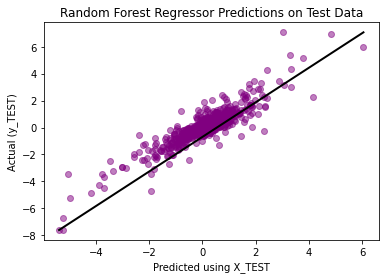

In [79]:
plt.scatter(rf_pred, y_TEST, color="purple", alpha=.5)
plt.plot([rf_pred.min(), rf_pred.max()], [y_TEST.min(), y_TEST.max()], color = 'black', linewidth = 2)
plt.xlabel('Predicted using X_TEST')
plt.ylabel('Actual (y_TEST)')
plt.title('Random Forest Regressor Predictions on Test Data')
plt.show()

### Top Model Parameters - GB

In [59]:
type(pipelines['gb'])

sklearn.pipeline.Pipeline

In [60]:
fitted_models['gb'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=400,
                                           random_state=123))])

In [61]:
### Actual pctChgSPX versus Prediction
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_TEST, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_TEST, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_TEST, rf_pred)))

Mean Absolute Error: 0.37815052401746724
Mean Squared Error: 0.3222196151040757
Root Mean Squared Error: 0.5676439157641661


In [62]:
# Calculate the absolute errors
errors = abs(gb_pred - y_TEST)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 *(errors / y_TEST)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.39 degrees.
Accuracy: 15.09 %.


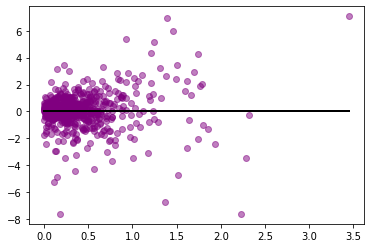

In [63]:
spxErrors = errors
plt.scatter(spxErrors, y_TEST, c='purple', alpha=.5)
plt.plot([spxErrors.min(), spxErrors.max()], [0, 0], color = 'black', linewidth = 2)

In [64]:
mape

2463     -110.83
649       443.58
866       115.87
2671       94.40
2472     -159.86
3414      -88.02
471        20.04
1373       28.78
773       -82.54
2580     -147.73
33       -240.90
198       -28.80
3347      -33.31
809        33.98
2307       35.97
3386       59.05
3189      -73.34
2572      154.70
3100        5.47
1453      -21.25
958        41.86
1881      -16.04
706       -42.51
463      -917.35
1954       -9.95
3193     -848.06
2538      329.73
1672        1.20
2510       29.97
2003     -122.03
1224      -20.88
2377     -145.97
547       726.02
1859       66.75
2746       94.41
1084       24.32
283       -47.11
875       -11.97
148        61.60
658        61.87
1939       34.33
1595       97.81
902       -29.01
527        31.23
85         17.89
3056       46.53
1806      301.26
3324       24.37
305        34.90
244         3.64
2147      -10.15
1688       99.03
1107       33.58
1182       14.12
2569      -64.49
465        -2.14
712        19.34
682       -76.89
2876       32.

In [65]:
#df.iloc[1587]

Text(0.5, 1.0, 'Actual vs Fitted Values for Price - GB')

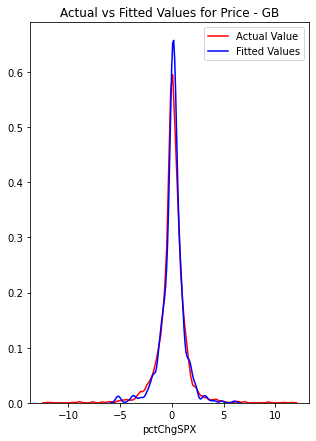

In [66]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price - GB')

### Top Model Parameters - RF

In [67]:
type(pipelines['rf'])

sklearn.pipeline.Pipeline

In [68]:
fitted_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=123))])

In [69]:
### Actual pctChgSPX versus Prediction
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_TEST, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_TEST, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_TEST, rf_pred)))

Mean Absolute Error: 0.37815052401746724
Mean Squared Error: 0.3222196151040757
Root Mean Squared Error: 0.5676439157641661


In [70]:
# Calculate the absolute errors
errors = abs(rf_pred - y_TEST)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 *(errors / y_TEST)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.38 degrees.
Accuracy: 29.56 %.


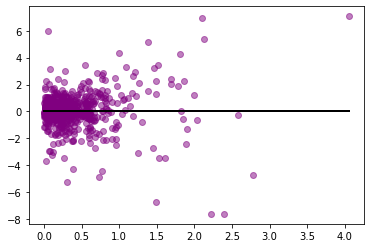

In [71]:
spxErrors = errors
plt.scatter(spxErrors, y_TEST, c='purple', alpha=.5)
plt.plot([spxErrors.min(), spxErrors.max()], [0, 0], color = 'black', linewidth = 2)

In [72]:
mape

2463      -77.84
649       347.93
866       131.90
2671       75.74
2472      -96.37
3414     -105.74
471        30.44
1373        2.67
773       -80.69
2580     -130.77
33       -282.50
198       -22.62
3347      -33.28
809        71.33
2307        3.23
3386       48.94
3189      -45.69
2572      116.48
3100        2.16
1453      -18.69
958        40.59
1881      -24.20
706       -38.60
463    -1,017.92
1954      -21.53
3193     -582.22
2538      513.93
1672        8.40
2510       33.88
2003      -65.10
1224       -0.85
2377     -117.09
547       348.20
1859       71.86
2746       88.32
1084       23.82
283       -58.33
875        -5.26
148        69.75
658        19.33
1939        2.58
1595       62.51
902       -37.94
527        28.79
85         23.68
3056       39.62
1806      367.22
3324        0.80
305        31.95
244        44.53
2147      -23.16
1688      103.50
1107       21.58
1182      130.24
2569     -128.50
465        -5.71
712        25.67
682      -111.85
2876       29.

In [73]:
#df.iloc[1587]

Text(0.5, 1.0, 'Actual vs Fitted Values for Price - RF')

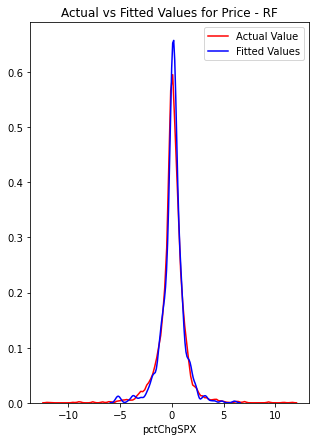

In [74]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price - RF')